In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 데이터 확인
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

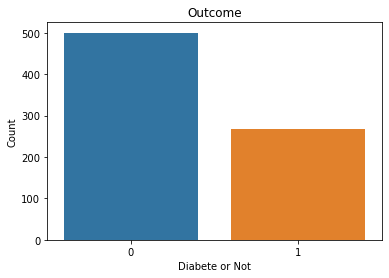

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabete or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [35]:
# 레이블(아웃컴) 갯수 확인 (숫자)
df['Outcome'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [8]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\isaac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\isaac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

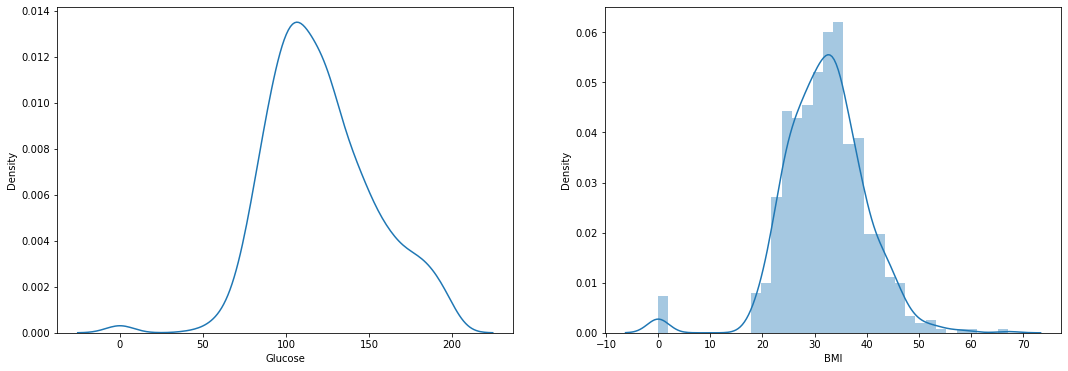

In [10]:
# 컬럼별 히스토그램 확인
# 'Glucose'와'BMI' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BMI'], ax=ax2)

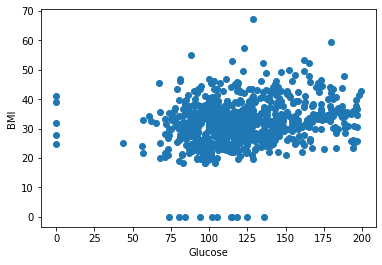

In [11]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')

plt.show()

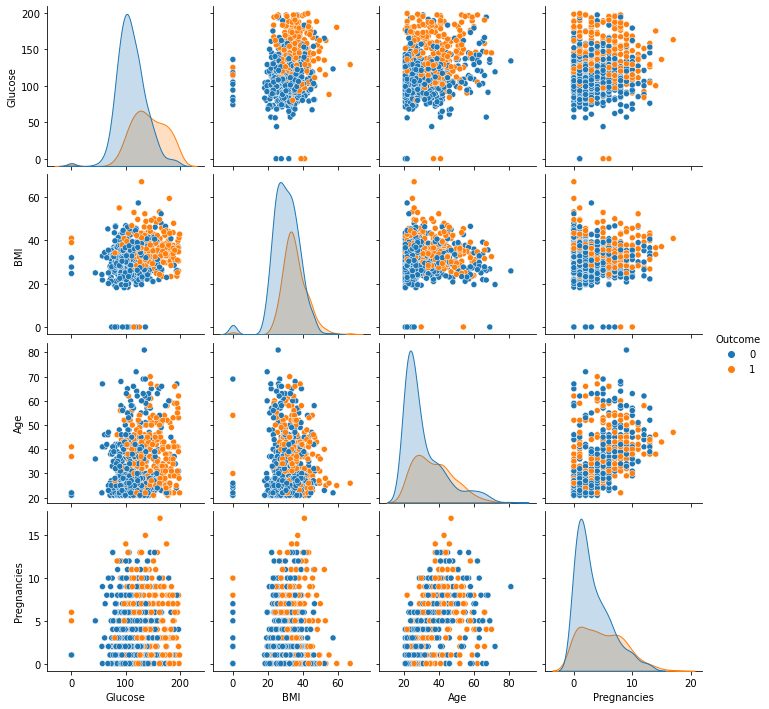

In [12]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BMI', 'Age', 'Pregnancies'],
            hue ='Outcome')
plt.show()

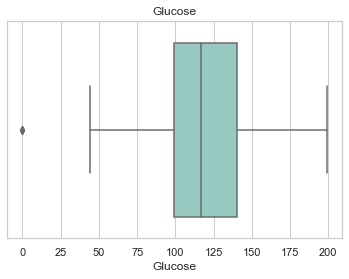

In [13]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose")
plt.show()

<ipython-input-14-59f636b60fdc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


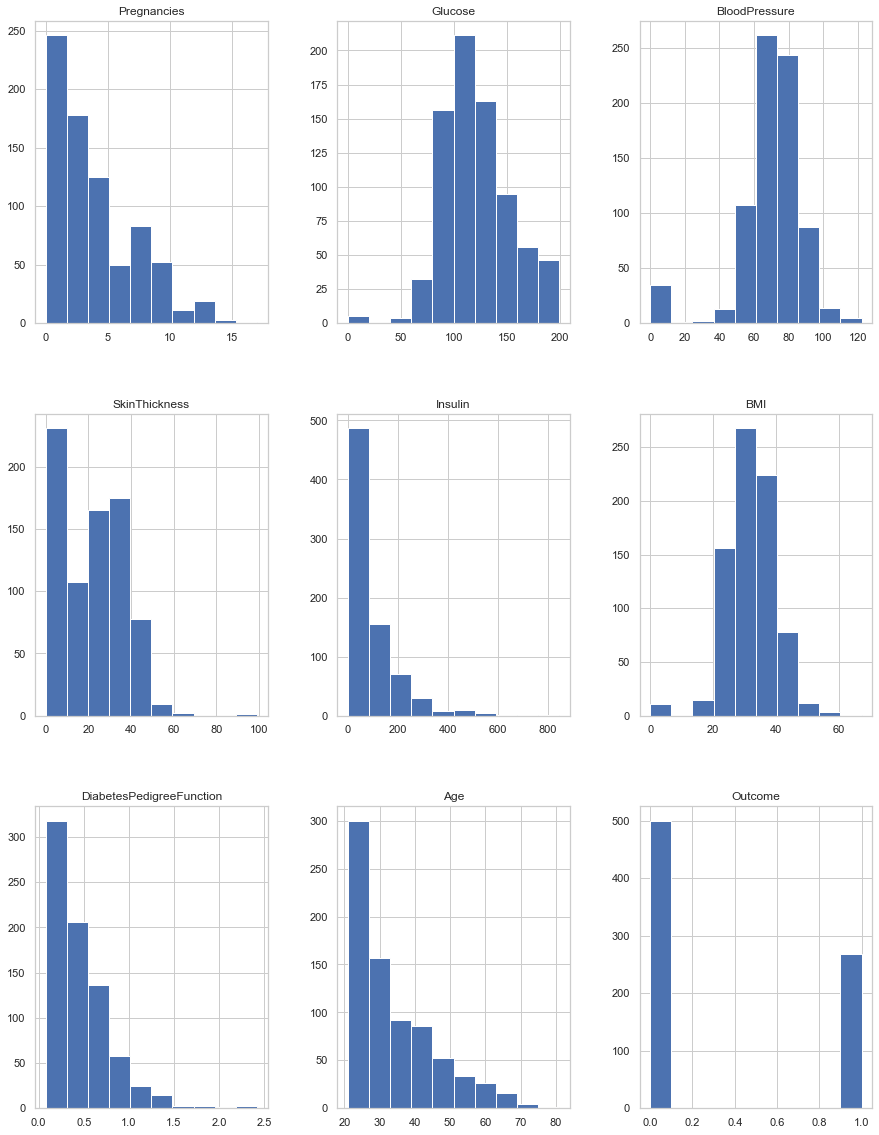

In [14]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [15]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [72]:
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 원-핫 인코딩

In [18]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [74]:
X = X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [75]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [76]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [77]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

손실함수

- Binary Crossentropy
    
    이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 
    여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다.
    보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 
    이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.
    
- Categorical Crossentropy
    
    다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 
    모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 
    소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 
    이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [58]:
# unique, counts = np.unique(y_train, return_counts=True)

# # 클래스별 개수 출력
# print(dict(zip(unique, counts)))

{0: 576, 1: 576}


In [59]:
# # y_train의 첫 번째 열을 사용하여 다시 확인
# unique, counts = np.unique(y_train[:, 0], return_counts=True)
# print(dict(zip(unique, counts)))

{0: 206, 1: 370}


In [99]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Dropout


model = Sequential()

# model.add(Dense(20,input_shape=(8,),activation='tanh'))
# model.add(Dense(16,activation='tanh'))
# model.add(Dense(12,activation='tanh'))
# model.add(Dense(8,activation='tanh'))
# model.add(Dense(4,activation='tanh'))
# model.add(Dense(2,activation='softmax'))

model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))  # 과적합 방지를 위한 Dropout
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 66        
Total params: 2,722
Trainable params: 2,722
Non-trainable params: 0
_________________________________________________________________


In [100]:
# 각 클래스에 대한 가중치 계산
# class_weight = {0: 1., 1: .}  # 클래스 '0'에 더 많은 가중치 부여

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test)) 
# validation_data는 검증데이터
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 [==============================] - 0s 10ms/step - loss: 5.1958 - accuracy: 0.5417 - val_loss: 1.1071 - val_accuracy: 0.6875
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 1.7648 - accuracy: 0.5625 - val_loss: 0.7021 - val_accuracy: 0.7135
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.5660 - val_loss: 0.6606 - val_accuracy: 0.6562
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.6076 - val_loss: 0.5950 - val_accuracy: 0.7083
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.7328 - accuracy: 0.6059 - val_loss: 0.6343 - val_accuracy: 0.6927
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.6215 - val_loss: 0.6176 - val_accuracy: 0.6719
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.6233 - val_loss: 0.6326 - val_accuracy: 0.6719
Epoch 8/30
18/18 [=

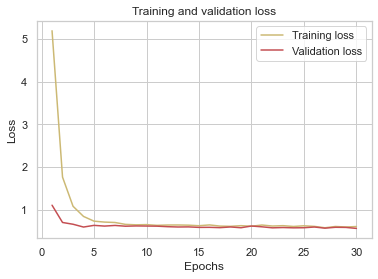

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

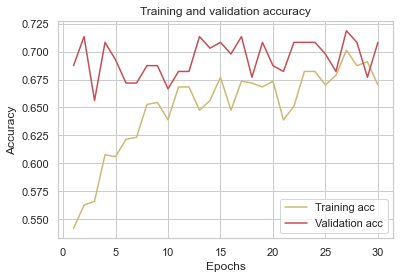

In [102]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       130
           1       0.80      0.13      0.22        62

    accuracy                           0.71       192
   macro avg       0.75      0.56      0.52       192
weighted avg       0.73      0.71      0.63       192

[[128   2]
 [ 54   8]]
